# 파이썬을 이용한 행렬 표현


## 파이썬에서 행렬은 리스트나 튜플 형식으로 만들어 numpy.array 명령어를 사용하여 만들 수도 있고, numpy에서 제공하는 다양한 배열(array) 명령어를 이용하여 직접 만들 수도 있다.

In [1]:
import pandas as pd
import numpy as np

In [2]:
A = ((1,1),(2,2),(3,3)) # tuple 형식으로 입력, list 형식도 가능하다
A = np.array(A)
A

array([[1, 1],
       [2, 2],
       [3, 3]])

In [3]:
A.shape

(3, 2)

In [4]:
A.shape[0]

3

In [5]:
B = np.ones((3,2))
B

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [6]:
A+B

array([[2., 2.],
       [3., 3.],
       [4., 4.]])

In [7]:
A-B

array([[0., 0.],
       [1., 1.],
       [2., 2.]])

In [8]:
A * B

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

In [9]:
A = np.arange(1,7).reshape(2,3)
A

array([[1, 2, 3],
       [4, 5, 6]])

In [10]:
B = np.arange(1,7).reshape(3,2)
B

array([[1, 2],
       [3, 4],
       [5, 6]])

In [11]:
# 파이썬에서 행렬의 곱을 게산하기 위해서는 numpy.matmul()과 @를 사용할 수 있다.

In [12]:
np.matmul(A,B)

array([[22, 28],
       [49, 64]])

In [13]:
A@B

array([[22, 28],
       [49, 64]])

In [14]:
# 전치행렬은  행렬의 행과 열의 위치를 대각선을 기준으로 바꾼다.

In [15]:
A

array([[1, 2, 3],
       [4, 5, 6]])

In [16]:
A.T # transpose

array([[1, 4],
       [2, 5],
       [3, 6]])

In [17]:
# 역행렬의 역행렬은 본래 행렬이다.

In [26]:
A = np.array([[1,2],[3,4]])
A


array([[1, 2],
       [3, 4]])

In [19]:
A_inverse = np.linalg.inv(A) # 역행렬
A_inverse

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [21]:
np.linalg.inv(A_inverse)

array([[1., 2.],
       [3., 4.]])

In [27]:
import numpy.linalg as la
A = np.arange(1,5).reshape(2,2)
B = np.arange(1,5).reshape(2,2)
np.round(la.inv(A@B),2)    # A,B 곱의 역행렬

array([[ 5.5 , -2.5 ],
       [-3.75,  1.75]])

In [61]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [62]:
def edu(x):
    if x == 2:
        return 6
    elif x == 3:
        return 9
    elif x == 4:
        return 12
    elif x == 5:
        return 14
    elif x == 6:
        return 16
    elif x == 7:
        return 18
    elif x == 8:
        return 21
    else:
        return 0
    

## 통계 패키지를 이용한 회귀분석

In [63]:
df = pd.read_csv('household_2020a.csv')
df['education_year'] = df['education'].apply(edu)

In [64]:
df1 = df[['income','education_year']]

In [41]:
edu_model = ols("income ~ education_year",data = df1).fit() # 독립변수 x는 교육연수이고 종속변수 y는 소득입니다.
print(edu_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     3247.
Date:                Mon, 08 May 2023   Prob (F-statistic):               0.00
Time:                        11:37:16   Log-Likelihood:            -1.7489e+05
No. Observations:               18064   AIC:                         3.498e+05
Df Residuals:                   18062   BIC:                         3.498e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        133.0011     81.599      1.

In [42]:
# 행렬을 이용하여 절편과 기울기, t값,p값,95% 유의수준에서 신뢰구간, 결정계수(R)를 구해보도록 하자.


In [45]:
edu = df1[['education_year']]
X = edu.values # X : 교육연수
ones = np.ones(X.shape[0])
X_mat = np.column_stack((ones,X))
X_mat

array([[ 1., 16.],
       [ 1., 21.],
       [ 1.,  6.],
       ...,
       [ 1., 16.],
       [ 1., 18.],
       [ 1., 16.]])

In [46]:
Y = df1['income'].values # Y : 소득
beta_hat = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(Y) # 243page  회귀계수 추정
beta_hat.round(4)

array([133.0011, 370.364 ])

## 회귀계수 추정량에 대한 유의성 검정을 위해서는 회귀계수 추정량에 대한 표준오차를 구해야 한다

In [47]:
Y_fitted = X_mat @ beta_hat  # Y 추정량
e = Y-Y_fitted   # 잔차
n = len(e)
k = beta_hat.shape[0]  # 설명변수 개수
sigma_hat2 = (e.T @ e) / (n-k) # 오차항의 분산에 대한 추정량
sigma_hat2.round(2)

15022435.44

In [48]:
XtX_Inv = np.linalg.inv(X_mat.T@X_mat)
cov = sigma_hat2 * XtX_Inv
cov

array([[6658.34653088, -496.14850569],
       [-496.14850569,   42.24729948]])

In [50]:
se = np.sqrt(cov)
se

C:\Users\gksal\AppData\Local\Temp/ipykernel_15944/342131091.py:1: RuntimeWarning: invalid value encountered in sqrt
  se = np.sqrt(cov)


array([[81.59869197,         nan],
       [        nan,  6.49979226]])

## 회귀계수 추정량에 대한 표준오차를 이용하여 회귀계수 값의 신뢰구간과 t값을 구한다.

In [51]:
se1 = np.zeros(k)
se1[0,] = se[0,0]
se1[1,] = se[1,1]
se1

array([81.59869197,  6.49979226])

In [53]:
lb = beta_hat - 2 * se1
hb = beta_hat + 2 * se1
bound = np.column_stack((lb,hb)) # 95% 유의수준에서 신뢰구간
bound.round(2)

array([[-30.2 , 296.2 ],
       [357.36, 383.36]])

In [54]:
t = beta_hat / se1
t.round(3)

array([ 1.63 , 56.981])

In [55]:
# p값을 구한다. p값은 t-분포의 양쪽 극단치의 확률을 구하기 때문에 구할 때 t 값이 음수 영역과 양수 영역인 경우 구하는 방식이 다르다.
# 또한 양측검정이기 때문에 t값에 해당하는 확률에 2를 곱해주어야 한다.


In [56]:
from scipy import stats
df = len(e) - 2
p0 = np.zeros(k)
for i in range(k):
    if t[i] > 0:
        p0[i,] = (1-stats.t.cdf(t[i],df=df))*2
    else:
        p0[i,] = (stats.t.cdf(t[i],df=df))*2
p0

array([0.10313123, 0.        ])

# 회귀분석:변수변환

## 로그변환 :

In [65]:
df1 = df.loc[(df['income']>0) & (df['asset']>0) & (df['education_year']>0) & (df['age'] > 0)] # 로그변환을 위해서 0이하를 가지고 있는 값을 제외


In [66]:
df2 = df1.copy()
df2['In_income'] = np.log(df2['income'])
df2['In_eduYear'] = np.log(df2['education_year'])

In [69]:
edu_model101 = ols("income ~ education_year",data = df2).fit()
print(edu_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     3247.
Date:                Mon, 08 May 2023   Prob (F-statistic):               0.00
Time:                        13:20:20   Log-Likelihood:            -1.7489e+05
No. Observations:               18064   AIC:                         3.498e+05
Df Residuals:                   18062   BIC:                         3.498e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        133.0011     81.599      1.

In [70]:
# 1. 소득은 수준변수  교육연수는 로그를 취하여 회귀분석
# 로그 교육 기간이 0.01 단위 증가는 소득이 0.01 X 4533만 원 증가한다.다른 말로 교육 기간이 1% 증가하면 소득은 45만 원 증가한다.

In [72]:
edu_model02 = ols("income ~ In_eduYear",data=df2).fit()
print(edu_model02.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     2488.
Date:                Mon, 08 May 2023   Prob (F-statistic):               0.00
Time:                        13:22:35   Log-Likelihood:            -1.6514e+05
No. Observations:               17027   AIC:                         3.303e+05
Df Residuals:                   17025   BIC:                         3.303e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6486.5654    226.101    -28.689      0.0

In [74]:
# 2. 소득은 로그값, 교육연수는 수준변수를 이용하여 회귀분석
# 교육 기간이 1년 증가하면 로그소득은 0.106만큼 증가. 다른 말로 1년 증가하면 소득은 100 X 0.106 = 10.6% 증가한다.

In [75]:
edu_model03 = ols("In_income ~ education_year",data=df2).fit()
print(edu_model03.summary())

                            OLS Regression Results                            
Dep. Variable:              In_income   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     4231.
Date:                Mon, 08 May 2023   Prob (F-statistic):               0.00
Time:                        13:28:01   Log-Likelihood:                -19579.
No. Observations:               17027   AIC:                         3.916e+04
Df Residuals:                   17025   BIC:                         3.918e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.8185      0.021    324.

In [76]:
# 3. 로그 소득값, 로그 교육연수 값을 이용하여 회귀분석
#  교육기간이 0.01 증가하면 로그 소득은 0.01 X 1.1430만큼 증가한다. 다른 말고 교육기간이 1% 증가하면 소득은 약 1.14% 증가함.

In [77]:
edu_model04 = ols("In_income ~ In_eduYear",data = df2).fit()
print(edu_model04.summary())

                            OLS Regression Results                            
Dep. Variable:              In_income   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     4208.
Date:                Mon, 08 May 2023   Prob (F-statistic):               0.00
Time:                        13:34:02   Log-Likelihood:                -19589.
No. Observations:               17027   AIC:                         3.918e+04
Df Residuals:                   17025   BIC:                         3.920e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3134      0.044    121.203      0.0

## 제곱항을 설명변수에 추가

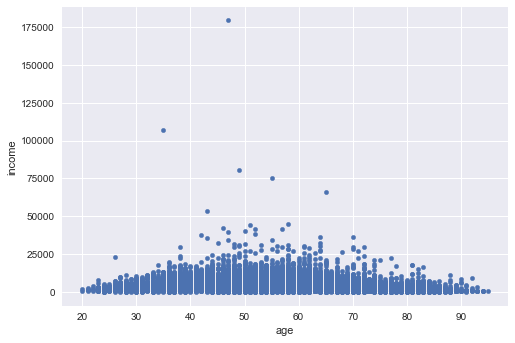

In [79]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
df2.plot(x='age',y='income',kind='scatter')
plt.show()

### 나이의 제곱항을 설명변수에 포함시킨다. 나이의 제곱이 포함된 모델의 경우 나이가 증가하면 소득이 오르지만, 증가폭이 커질수록 감소하는 것으로 나타나 소득과 나이와의 관계를 잘 설명하고 있다.

In [80]:
df2['age2'] = df2['age'] ** 2
edu_model = ols("income ~ education_year + age +age2",data = df2).fit()
print(edu_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     1212.
Date:                Mon, 08 May 2023   Prob (F-statistic):               0.00
Time:                        13:43:20   Log-Likelihood:            -1.6465e+05
No. Observations:               17027   AIC:                         3.293e+05
Df Residuals:                   17023   BIC:                         3.293e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.002e+04    428.132    -23.

### 해당 회귀식으로부터 추정한 이차다항식으로부터 임금이 최대인 연령의 집단을 구한다
### 소득 = -10020 + 401*교육연수 + 378 * 나이  - 3.4 * 나이( 제곱)

## 더미변수 추가
### 성별과 직업 종류, 결혼 상태가 소득에 영향을 미치는지 살펴보기 위해 성별 더미, 직업 종류, 결혼 상태 더미를 만든다.

In [82]:
df2['job_code'] = df2['job']
df2['sex'] = (df2['sex']).astype(int)
# 남녀 성별 더미변수 만들기
sex_dummies = pd.get_dummies(df2['sex']).rename(columns=lambda x: 's' + str(x))
sex_dummies.tail()

,s1,s2
18058,1,0
18060,1,0
18061,1,0
18062,0,1
18063,1,0


In [83]:
# 직업 더미변수 만들기
job_dummies = pd.get_dummies(df2['job_code']).rename(columns=lambda x : 'd'+str(x))
job_dummies.tail()

,d1,d2,d3,d4,d5,d6,d7,d8,d9,dA
18058,0,1,0,0,0,0,0,0,0,0
18060,0,0,1,0,0,0,0,0,0,0
18061,0,0,0,0,0,0,0,0,0,0
18062,0,1,0,0,0,0,0,0,0,0
18063,0,0,1,0,0,0,0,0,0,0


In [84]:
# 결혼 형태 더미변수 만들기
marriage_dummies = pd.get_dummies(df2['marriage']).rename(columns = lambda x : 'm'+str(x))
marriage_dummies.tail()

,m1,m2,m3,m4
18058,0,1,0,0
18060,0,1,0,0
18061,0,1,0,0
18062,0,0,0,1
18063,0,1,0,0


In [85]:
# 더미변수 통합하기'
df3 = pd.concat([df2,job_dummies,sex_dummies,marriage_dummies],axis = 1)
 # 다른 요인이 동일하다고 가정한 경우 여성 가구주는 남성 가구주보다 연소득이 1571만원 적습니다. 이는 1% 수준에서 통계적으로 유의하다

In [86]:
edu_model = ols("income ~ education_year + age + age2 + s2",data=df3).fit()
print(edu_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     1057.
Date:                Mon, 08 May 2023   Prob (F-statistic):               0.00
Time:                        14:01:50   Log-Likelihood:            -1.6441e+05
No. Observations:               17027   AIC:                         3.288e+05
Df Residuals:                   17022   BIC:                         3.289e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -8244.1320    429.710    -19.

In [87]:
edu1_model = ols("income ~ education_year + age + age2 + s2 + d2 + d3 + d4 + d5 + d6 + d7 + d8 + d9 + dA",data = df3).fit()
print(edu1_model.summary())  # d1을 뺏으니까 d1과 상대적으로 비교하면 된다

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     387.4
Date:                Mon, 08 May 2023   Prob (F-statistic):               0.00
Time:                        14:06:03   Log-Likelihood:            -1.6409e+05
No. Observations:               17027   AIC:                         3.282e+05
Df Residuals:                   17013   BIC:                         3.283e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -9057.7109    425.290    -21.

In [88]:
# 결혼 상태 1.미혼 2. 배우자 있음 3. 사별  4. 이혼

In [89]:
edu2_model = ols('income ~ education_year + age + age2 + s2 + d2 + d3 + d4 + d5 + d6 + d7 + d8 + d9 + dA + m2 + m3 + m4',data = df3).fit()
print(edu2_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     394.3
Date:                Mon, 08 May 2023   Prob (F-statistic):               0.00
Time:                        14:09:58   Log-Likelihood:            -1.6361e+05
No. Observations:               17027   AIC:                         3.273e+05
Df Residuals:                   17010   BIC:                         3.274e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -8925.6876    418.254    -21.

# 교육 연수, 나이, 성별, 직업 등이 소득에 미치는 영향

In [92]:
from statsmodels.iolib.summary2 import summary_col
df3['const'] = 1
# create lists of variables to be used in each regression
x1 = ['const','education_year']
x2 = ['const','education_year','age','age2']
x3 = ['const','education_year','age','age2','s2']
x4 = ['const','education_year','age','age2','s2','d2','d3','d4','d5','d6','d7','d8','d9','dA']
x5 = ['const','education_year','age','age2','s2','d2','d3','d4','d5','d6','d7','d8','d9','dA','m2','m3','m4']
# estimate an ols regression for each set of variables
reg1 = sm.OLS(df3['income'],df3[x1],missing='drop').fit()
reg2 = sm.OLS(df3['income'],df3[x2],missing='drop').fit()
reg3 = sm.OLS(df3['income'],df3[x3],missing='drop').fit()
reg4 = sm.OLS(df3['income'],df3[x4],missing='drop').fit()
reg5 = sm.OLS(df3['income'],df3[x5],missing='drop').fit()
info_dict = {'R-squared': lambda x : f"{x.rsquared:.2f}",
            'No.observations' : lambda x : f"{int(x.nobs):d}"
            }
results_table = summary_col(results=[reg1,reg2,reg3,reg4,reg5],float_format='%0.2f',stars = True,
                           model_names = ['Model1','Model2','Model3','Model4','Model5'],
                           info_dict = info_dict,
                           regressor_order = ['const','education_year','age','age2','s2','d2','d3','d4','d5','d6','d7','d8','d9','dA','m2','m3','m4']
                           )
results_table.add_title('Table 1 - OLS Regressions')
print(results_table)

                         Table 1 - OLS Regressions
                  Model1      Model2       Model3      Model4      Model5  
---------------------------------------------------------------------------
const           -736.91*** -10015.12*** -8244.13*** -9057.71*** -8925.69***
                (107.76)   (428.13)     (429.71)    (425.29)    (418.25)   
education_year  438.55***  401.15***    349.89***   267.95***   243.73***  
                (8.36)     (9.73)       (9.87)      (10.70)     (10.50)    
age                        378.06***    351.77***   361.26***   314.35***  
                           (14.29)      (14.14)     (14.14)     (14.48)    
age2                       -3.42***     -3.21***    -3.10***    -2.88***   
                           (0.12)       (0.12)      (0.13)      (0.13)     
s2                                      -1571.17*** -1558.00*** -440.74*** 
                                        (71.20)     (73.81)     (90.50)    
d2                                   